In [5]:
!pip install tabulate

You should consider upgrading via the '/home/sljack/miniconda3/bin/python -m pip install --upgrade pip' command.


In [189]:
import pandas as pd
from pathlib import Path

import json

def get_steps(i, row):
    d = row
    step_df = pd.json_normalize(d.steps).melt(id_vars='name').dropna().set_index(['name', 'variable']).T
    step_df['job_id'] = int(i) 
    return step_df

def load_json(path):
    with path.open('r') as f:
        data = json.load(f)
    return data

def process_steps(subset_df):
    steps = [get_steps(i, row) for i, row in subset_df.iterrows()]
    steps = pd.concat(steps)
    steps.columns = [' '.join(col).strip() for col in steps.columns.values]
    steps = steps.set_index('job_id')
    final = pd.concat([subset_df, steps], axis=1)
    return final

def to_markdown(final, filename):
    columns = ['machine', 'cpu_opt', 'RELION_NUM_CPUS', 'RELION_CPU_THREADS_PER_TASK']
    columns.extend([c for c in final.columns if 'relion' in c])
    final_md = final[columns].copy()
    final_md = final_md.rename({'machine': 'Machine', 'cpu_opt': 'CPU Optimized', 'RELION_NUM_CPUS': 'No. Tasks', 'RELION_CPU_THREADS_PER_TASK': 'Threads Per CPU'}, axis=1)
    markdown = final_md.T.to_markdown(tablefmt="github")
    with Path(filename).open('w') as handle:
        handle.write(markdown)

## Pearl

In [190]:
metrics = list(Path('runs/pearl/').glob('**/*.json'))

df = pd.DataFrame([load_json(path) for path in metrics])
df['path'] = metrics
df['job_id'] = list(map(lambda x: int(str(x).split('/')[2].split('_')[-1]), metrics))
df = df.set_index('job_id')
df = df.sort_index()
df

,pipeline_file,total_duration,steps,RELION_OPT_FLAGS,RELION_CMD,RELION_CPUS_PER_TASK,RELION_OUTPUT_DIR,RELION_PROJ_DIR,RELION_IMG,path
job_id,,,,,,,,,,
28211,benchmark_scripts/pipeline_2nd_refine3D_single.sh,0.000097,[],--gpu,singularity run --nv -B /mnt/beegfs/work/stfc/...,,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,runs/pearl/job_28211/metrics.json
28256,benchmark_scripts/rabbit_aldolase_benchmark.sh,31785.126390,"[{'name': 'relion_refine_mpi', 'duration': 278...",--gpu --dont_combine_weights_via_disc --pool 30,singularity run --nv -B /mnt/beegfs/work/stfc/...,2,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,runs/pearl/job_28256/metrics.json
28257,benchmark_scripts/rabbit_aldolase_benchmark.sh,16983.383853,"[{'name': 'relion_refine_mpi', 'duration': 145...",--gpu --dont_combine_weights_via_disc --pool 30,singularity run --nv -B /mnt/beegfs/work/stfc/...,2,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,runs/pearl/job_28257/metrics.json
28258,benchmark_scripts/rabbit_aldolase_benchmark.sh,10561.797234,"[{'name': 'relion_refine_mpi', 'duration': 937...",--gpu --dont_combine_weights_via_disc --pool 30,singularity run --nv -B /mnt/beegfs/work/stfc/...,2,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,runs/pearl/job_28258/metrics.json
28259,benchmark_scripts/rabbit_aldolase_benchmark.sh,4969.295334,"[{'name': 'relion_refine_mpi', 'duration': 426...",--gpu --dont_combine_weights_via_disc --pool 30,singularity run --nv -B /mnt/beegfs/work/stfc/...,2,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,runs/pearl/job_28259/metrics.json
...,...,...,...,...,...,...,...,...,...,...
28470,benchmark_scripts/10338/pipeline_class3d_1.sh,22027.488332,"[{'name': 'relion_refine_mpi', 'duration': 220...",--gpu --dont_combine_weights_via_disc --pool 30,singularity run --nv -B /mnt/beegfs/work/stfc/...,2,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,runs/pearl/job_28470/metrics.json
28471,benchmark_scripts/10338/pipeline_class3d_1.sh,11079.619311,"[{'name': 'relion_refine_mpi', 'duration': 110...",--gpu --dont_combine_weights_via_disc --pool 30,singularity run --nv -B /mnt/beegfs/work/stfc/...,2,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,runs/pearl/job_28471/metrics.json
28472,benchmark_scripts/10338/pipeline_class3d_1.sh,6053.843517,"[{'name': 'relion_refine_mpi', 'duration': 603...",--gpu --dont_combine_weights_via_disc --pool 30,singularity run --nv -B /mnt/beegfs/work/stfc/...,2,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,runs/pearl/job_28472/metrics.json


### Stage 0

In [134]:
subset_df = df.loc[df.pipeline_file.map(lambda x: 'class2d' in x)]
subset_df = subset_df.loc[subset_df.index >= 28449]
final = process_steps(subset_df)
final.to_csv('runs/pearl_10338_0.csv')
final

,pipeline_file,total_duration,steps,RELION_OPT_FLAGS,RELION_CMD,RELION_CPUS_PER_TASK,RELION_OUTPUT_DIR,RELION_PROJ_DIR,RELION_IMG,path,...,relion_refine_mpi class_92_occ,relion_refine_mpi class_93_occ,relion_refine_mpi class_94_occ,relion_refine_mpi class_95_occ,relion_refine_mpi class_96_occ,relion_refine_mpi class_97_occ,relion_refine_mpi class_98_occ,relion_refine_mpi class_99_occ,relion_refine_mpi class_100_occ,relion_refine_mpi num_top
job_id,,,,,,,,,,,,,,,,,,,,,
28449,benchmark_scripts/10338/pipeline_class2d_0.sh,46548.988617,"[{'name': 'relion_refine_mpi', 'duration': 465...",--gpu --dont_combine_weights_via_disc --pool 30,singularity run --nv -B /mnt/beegfs/work/stfc/...,2,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,runs/pearl/job_28449/metrics.json,...,0.008534,0.012699,0.000000,0.023186,0.000005,0.010684,0.000087,0.009762,0.000000,21.0
28450,benchmark_scripts/10338/pipeline_class2d_0.sh,24020.776336,"[{'name': 'relion_refine_mpi', 'duration': 240...",--gpu --dont_combine_weights_via_disc --pool 30,singularity run --nv -B /mnt/beegfs/work/stfc/...,2,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,runs/pearl/job_28450/metrics.json,...,0.037592,0.008819,0.027732,0.005010,0.032148,0.002915,0.032508,0.000000,0.013039,21.0
28451,benchmark_scripts/10338/pipeline_class2d_0.sh,11591.925723,"[{'name': 'relion_refine_mpi', 'duration': 115...",--gpu --dont_combine_weights_via_disc --pool 30,singularity run --nv -B /mnt/beegfs/work/stfc/...,2,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,runs/pearl/job_28451/metrics.json,...,0.000000,0.008888,0.032710,0.032234,0.000000,0.000000,0.022161,0.000000,0.048005,20.0
28452,benchmark_scripts/10338/pipeline_class2d_0.sh,6249.951942,"[{'name': 'relion_refine_mpi', 'duration': 624...",--gpu --dont_combine_weights_via_disc --pool 30,singularity run --nv -B /mnt/beegfs/work/stfc/...,2,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,runs/pearl/job_28452/metrics.json,...,0.001338,0.020192,0.016340,0.004563,0.000000,0.015314,0.017048,0.010215,0.000031,24.0
28453,benchmark_scripts/10338/pipeline_class2d_0.sh,3801.543931,"[{'name': 'relion_refine_mpi', 'duration': 380...",--gpu --dont_combine_weights_via_disc --pool 30,singularity run --nv -B /mnt/beegfs/work/stfc/...,2,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,runs/pearl/job_28453/metrics.json,...,0.016544,0.000000,0.000000,0.027513,0.000000,0.000000,0.025582,0.001137,0.010817,21.0


### Stage 1

In [135]:
subset_df = df.loc[df.pipeline_file.map(lambda x: 'class3d' in x)]
subset_df = subset_df.loc[subset_df.index >= 28470]
final = process_steps(subset_df)
final.to_csv('runs/pearl_10338_1.csv')
final

,pipeline_file,total_duration,steps,RELION_OPT_FLAGS,RELION_CMD,RELION_CPUS_PER_TASK,RELION_OUTPUT_DIR,RELION_PROJ_DIR,RELION_IMG,path,relion_refine_mpi duration,relion_star_handler duration
job_id,,,,,,,,,,,,
28470,benchmark_scripts/10338/pipeline_class3d_1.sh,22027.488332,"[{'name': 'relion_refine_mpi', 'duration': 220...",--gpu --dont_combine_weights_via_disc --pool 30,singularity run --nv -B /mnt/beegfs/work/stfc/...,2,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,runs/pearl/job_28470/metrics.json,22011.925778,15.496769
28471,benchmark_scripts/10338/pipeline_class3d_1.sh,11079.619311,"[{'name': 'relion_refine_mpi', 'duration': 110...",--gpu --dont_combine_weights_via_disc --pool 30,singularity run --nv -B /mnt/beegfs/work/stfc/...,2,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,runs/pearl/job_28471/metrics.json,11064.295141,15.259657
28472,benchmark_scripts/10338/pipeline_class3d_1.sh,6053.843517,"[{'name': 'relion_refine_mpi', 'duration': 603...",--gpu --dont_combine_weights_via_disc --pool 30,singularity run --nv -B /mnt/beegfs/work/stfc/...,2,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,runs/pearl/job_28472/metrics.json,6037.871478,15.896889
28473,benchmark_scripts/10338/pipeline_class3d_1.sh,3391.333322,"[{'name': 'relion_refine_mpi', 'duration': 337...",--gpu --dont_combine_weights_via_disc --pool 30,singularity run --nv -B /mnt/beegfs/work/stfc/...,2,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,runs/pearl/job_28473/metrics.json,3375.778543,15.494740
28474,benchmark_scripts/10338/pipeline_class3d_1.sh,2410.381920,"[{'name': 'relion_refine_mpi', 'duration': 239...",--gpu --dont_combine_weights_via_disc --pool 30,singularity run --nv -B /mnt/beegfs/work/stfc/...,2,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,runs/pearl/job_28474/metrics.json,2394.473238,15.847674


### Stage 2

In [3]:
subset_df = df.loc[range(28256, 28261)]

steps = [get_steps(i, row) for i, row in subset_df.iterrows()]
steps = pd.concat(steps)
steps.columns = [' '.join(col).strip() for col in steps.columns.values]
steps = steps.set_index('job_id')
final = subset_df.join(steps)

drop_names = ['steps', 'path']

final = final.drop(drop_names, axis=1)
final.to_csv('runs/pearl_10338_2.csv')
final

,pipeline_file,total_duration,RELION_OPT_FLAGS,RELION_CMD,RELION_CPUS_PER_TASK,RELION_OUTPUT_DIR,RELION_PROJ_DIR,RELION_IMG,relion_refine_mpi duration,relion_mask_create duration,relion_postprocess duration,relion_ctf_refine_mpi duration,relion_refine_mpi acc_rotation,relion_refine_mpi acc_translation,relion_refine_mpi resolution,relion_postprocess _rlnFinalResolution,relion_postprocess _rlnBfactorUsedForSharpening,relion_postprocess _rlnParticleBoxFractionSolventMask,relion_ctf_refine_mpi beam_tilt_x,relion_ctf_refine_mpi beam_tilt_y
job_id,,,,,,,,,,,,,,,,,,,,
28256,benchmark_scripts/rabbit_aldolase_benchmark.sh,31785.126390,--gpu --dont_combine_weights_via_disc --pool 30,singularity run --nv -B /mnt/beegfs/work/stfc/...,2,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,27851.319829,41.742234,11.263679,3880.546141,1.227,0.47824,3.629367,3.150769,-114.15386,44.736736,-0.11276,0.103340
28257,benchmark_scripts/rabbit_aldolase_benchmark.sh,16983.383853,--gpu --dont_combine_weights_via_disc --pool 30,singularity run --nv -B /mnt/beegfs/work/stfc/...,2,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,14575.145715,41.833230,11.278026,2354.872569,1.213,0.47824,3.629367,3.150769,-114.15386,44.736736,-0.11172,0.104509
28258,benchmark_scripts/rabbit_aldolase_benchmark.sh,10561.797234,--gpu --dont_combine_weights_via_disc --pool 30,singularity run --nv -B /mnt/beegfs/work/stfc/...,2,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,9376.763466,41.483767,11.122175,1132.167431,1.234,0.48720,3.629367,3.150769,-114.15386,44.736736,-0.11315,0.102733
28259,benchmark_scripts/rabbit_aldolase_benchmark.sh,4969.295334,--gpu --dont_combine_weights_via_disc --pool 30,singularity run --nv -B /mnt/beegfs/work/stfc/...,2,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,4265.943474,40.933882,10.791401,651.377325,1.233,0.47824,3.629367,3.150769,-114.15386,44.736736,-0.11153,0.107299
28260,benchmark_scripts/rabbit_aldolase_benchmark.sh,2841.958082,--gpu --dont_combine_weights_via_disc --pool 30,singularity run --nv -B /mnt/beegfs/work/stfc/...,2,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,2357.543861,40.919573,11.211144,432.041524,1.224,0.48160,3.629367,3.150769,-114.15386,44.736736,-0.11405,0.100917


### Stage 3

In [132]:
subset_df = df.loc[range(28301, 28306)]

steps = [get_steps(i, row) for i, row in subset_df.iterrows()]
steps = pd.concat(steps)
steps.columns = [' '.join(col).strip() for col in steps.columns.values]
steps = steps.set_index('job_id')
final = subset_df.join(steps)

drop_names = ['steps', 'path']

final = final.drop(drop_names, axis=1)
final.to_csv('runs/pearl_10338_3.csv')
final

KeyError: "None of [Int64Index([28301, 28302, 28303, 28304, 28305], dtype='int64', name='job_id')] are in the [index]"

## Stage 4

In [20]:
subset_df = df.loc[df.pipeline_file.map(lambda x: 'refine3d_4' in x)]
subset_df = subset_df.loc[subset_df.index >= 28434]
final = process_steps(subset_df)
final.to_csv('runs/pearl_10338_4.csv')
final

,pipeline_file,total_duration,steps,RELION_OPT_FLAGS,RELION_CMD,RELION_CPUS_PER_TASK,RELION_OUTPUT_DIR,RELION_PROJ_DIR,RELION_IMG,path,relion_refine_mpi duration,relion_mask_create duration,relion_postprocess duration,relion_postprocess _rlnFinalResolution,relion_postprocess _rlnBfactorUsedForSharpening,relion_postprocess _rlnParticleBoxFractionSolventMask
job_id,,,,,,,,,,,,,,,,
28434,benchmark_scripts/10338/pipeline_refine3d_4.sh,70653.873398,"[{'name': 'relion_refine_mpi', 'duration': 694...",--gpu --dont_combine_weights_via_disc --pool 30,singularity run --nv -B /mnt/beegfs/work/stfc/...,2,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,runs/pearl/job_28434/metrics.json,69458.819944,1121.196138,73.838965,3.150769,-111.32904,38.844176
28435,benchmark_scripts/10338/pipeline_refine3d_4.sh,37108.154967,"[{'name': 'relion_refine_mpi', 'duration': 357...",--gpu --dont_combine_weights_via_disc --pool 30,singularity run --nv -B /mnt/beegfs/work/stfc/...,2,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,runs/pearl/job_28435/metrics.json,35791.652910,1237.270732,79.211636,3.150769,-111.32904,38.844176
28436,benchmark_scripts/10338/pipeline_refine3d_4.sh,19098.311362,"[{'name': 'relion_refine_mpi', 'duration': 178...",--gpu --dont_combine_weights_via_disc --pool 30,singularity run --nv -B /mnt/beegfs/work/stfc/...,2,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,runs/pearl/job_28436/metrics.json,17890.550552,1132.880807,74.862843,3.150769,-111.32904,38.844176
28437,benchmark_scripts/10338/pipeline_refine3d_4.sh,11467.192706,"[{'name': 'relion_refine_mpi', 'duration': 102...",--gpu --dont_combine_weights_via_disc --pool 30,singularity run --nv -B /mnt/beegfs/work/stfc/...,2,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,runs/pearl/job_28437/metrics.json,10230.522872,1160.866455,75.787397,3.150769,-111.32904,38.844176
28438,benchmark_scripts/10338/pipeline_refine3d_4.sh,9210.034118,"[{'name': 'relion_refine_mpi', 'duration': 803...",--gpu --dont_combine_weights_via_disc --pool 30,singularity run --nv -B /mnt/beegfs/work/stfc/...,2,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,runs/pearl/job_28438/metrics.json,8035.508207,1099.844128,74.662773,3.150769,-111.32904,38.844176


## Stage 5

In [17]:
subset_df = df.loc[df.pipeline_file.map(lambda x: 'polish_5' in x)]
subset_df = subset_df.loc[subset_df.index >= 28460]
final = process_steps(subset_df)
final.to_csv('runs/pearl_10338_5.csv')
final

,pipeline_file,total_duration,steps,RELION_OPT_FLAGS,RELION_CMD,RELION_CPUS_PER_TASK,RELION_OUTPUT_DIR,RELION_PROJ_DIR,RELION_IMG,path,relion_motion_refine duration,relion_motion_refine_mpi duration,relion_motion_refine 0,relion_motion_refine_mpi 0,relion_motion_refine 1,relion_motion_refine_mpi 1,relion_motion_refine 2,relion_motion_refine_mpi 2
job_id,,,,,,,,,,,,,,,,,,
28460,benchmark_scripts/10338/pipeline_polish_5.sh,170776.378413,"[{'name': 'relion_motion_refine', 'duration': ...",--gpu --dont_combine_weights_via_disc --pool 30,singularity run --nv -B /mnt/beegfs/work/stfc/...,2,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,runs/pearl/job_28460/metrics.json,54519.209135,116257.158710,0.8925,0.8925,8190.0,8190.0,2.82,2.82
28461,benchmark_scripts/10338/pipeline_polish_5.sh,117185.027874,"[{'name': 'relion_motion_refine', 'duration': ...",--gpu --dont_combine_weights_via_disc --pool 30,singularity run --nv -B /mnt/beegfs/work/stfc/...,2,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,runs/pearl/job_28461/metrics.json,51114.222651,66070.794206,0.8925,0.8925,8190.0,8190.0,2.82,2.82
28462,benchmark_scripts/10338/pipeline_polish_5.sh,66939.358027,"[{'name': 'relion_motion_refine', 'duration': ...",--gpu --dont_combine_weights_via_disc --pool 30,singularity run --nv -B /mnt/beegfs/work/stfc/...,2,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,runs/pearl/job_28462/metrics.json,50473.785503,16465.550586,0.8925,0.8925,8190.0,8190.0,2.82,2.82
28463,benchmark_scripts/10338/pipeline_polish_5.sh,51869.925626,"[{'name': 'relion_motion_refine', 'duration': ...",--gpu --dont_combine_weights_via_disc --pool 30,singularity run --nv -B /mnt/beegfs/work/stfc/...,2,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,runs/pearl/job_28463/metrics.json,51617.597908,252.318639,0.8925,0.8925,8190.0,8190.0,2.82,2.82
28464,benchmark_scripts/10338/pipeline_polish_5.sh,58959.961766,"[{'name': 'relion_motion_refine', 'duration': ...",--gpu --dont_combine_weights_via_disc --pool 30,singularity run --nv -B /mnt/beegfs/work/stfc/...,2,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,runs/pearl/job_28464/metrics.json,58879.324035,80.519207,0.8925,0.8925,8190.0,8190.0,2.82,2.82


## Plasmodium

In [5]:
subset_df = df.reindex(range(28261, 28266))
subset_df = subset_df.dropna()


# drop_names = ['pipeline_file', 'steps', 'path']

final = final.drop(drop_names, axis=1)
final.to_csv('runs/pearl_plasmodium.csv')
final

,pipeline_file,total_duration,RELION_OPT_FLAGS,RELION_CMD,RELION_CPUS_PER_TASK,RELION_OUTPUT_DIR,RELION_PROJ_DIR,RELION_IMG,relion_refine_mpi duration,relion_refine_mpi duration
job_id,,,,,,,,,,
28261,benchmark_scripts/plasmodium_ribosome_benchmar...,83173.580029,--gpu,singularity run --nv -B /mnt/beegfs/work/stfc/...,2,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,76029.187243,7144.386019
28262,benchmark_scripts/plasmodium_ribosome_benchmar...,39838.161119,--gpu,singularity run --nv -B /mnt/beegfs/work/stfc/...,2,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,37526.424424,2311.719316
28263,benchmark_scripts/plasmodium_ribosome_benchmar...,18710.245531,--gpu,singularity run --nv -B /mnt/beegfs/work/stfc/...,2,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,17673.565626,1036.668402
28264,benchmark_scripts/plasmodium_ribosome_benchmar...,11656.127910,--gpu,singularity run --nv -B /mnt/beegfs/work/stfc/...,2,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,10487.928947,1168.177476
28265,benchmark_scripts/plasmodium_ribosome_benchmar...,8561.946626,--gpu,singularity run --nv -B /mnt/beegfs/work/stfc/...,2,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,/mnt/beegfs/work/stfc/pearl008/intel-e2e-bench...,7388.201614,1173.733041


# SCARF/CLX/ICX

In [198]:
# machine, min_job_id = 'scarf', 229744
machine, min_job_id = 'clx', 77577
# machine, min_job_id = 'icx', 0

def load_metrics(machine, min_job_id):
    metrics = list(Path(f'runs/{machine}').rglob('*.json'))

    def load_json(path):
        with path.open('r') as f:
            data = json.load(f)
        return data

    df = pd.DataFrame([load_json(path) for path in metrics])
    df['path'] = metrics

    if machine != 'icx':
        df['job_id'] = list(map(lambda x: int(str(x).split('/')[2].split('_')[-1]), metrics))
    else:
        df['job_id'] = df.pipeline_file.map(lambda x: int(Path(x).stem.split('_')[-1]))

    df = df.set_index('job_id')
    df = df[df.index >= min_job_id]
    df['stage'] = df.pipeline_file.str.split('_').map(lambda x: x[-1].split('.')[0])

    df['cpu_opt'] = df.RELION_OPT_FLAGS.map(lambda x: '--cpu' in x)

    df = df.sort_index()
    df['machine'] = machine
    return df

df = load_metrics(machine, min_job_id)
df

,pipeline_file,total_duration,steps,RELION_OPT_FLAGS,RELION_CMD,RELION_SCRIPT_NAME,RELION_CPU_THREADS_PER_TASK,RELION_MPI_FLAGS,RELION_PROJ_DIR,RELION_OUTPUT_DIR,RELION_NUM_CPUS,RELION_CPUS_PER_TASK,path,stage,cpu_opt,machine
job_id,,,,,,,,,,,,,,,,
77577,benchmark_scripts/10338/pipeline_class2d_0.sh,22635.196668,"[{'name': 'relion_refine_mpi', 'duration': 226...",--dont_combine_weights_via_disc --pool 23 --cp...,,./benchmark_scripts/10338/pipeline_class2d_0.sh,4,-n 23,/home/nx07/nx07/sljack92/relion/10338,/home/nx07/nx07/sljack92/intel-e2e-benchmark/c...,23,1,runs/clx/job_77577/metrics.json,0,True,clx
77578,benchmark_scripts/10338/pipeline_class3d_1.sh,24193.768611,"[{'name': 'relion_refine_mpi', 'duration': 241...",--dont_combine_weights_via_disc --pool 23 --cp...,,./benchmark_scripts/10338/pipeline_class3d_1.sh,4,-n 23,/home/nx07/nx07/sljack92/relion/10338,/home/nx07/nx07/sljack92/intel-e2e-benchmark/c...,23,1,runs/clx/job_77578/metrics.json,1,True,clx
77579,benchmark_scripts/10338/pipeline_refine3d_2.sh,16207.495656,"[{'name': 'relion_refine_mpi', 'duration': 159...",--dont_combine_weights_via_disc --pool 23 --cp...,,./benchmark_scripts/10338/pipeline_refine3d_2.sh,4,-n 23,/home/nx07/nx07/sljack92/relion/10338,/home/nx07/nx07/sljack92/intel-e2e-benchmark/c...,23,1,runs/clx/job_77579/metrics.json,2,True,clx
77580,benchmark_scripts/10338/pipeline_refine3d_3.sh,22030.048211,"[{'name': 'relion_refine_mpi', 'duration': 214...",--dont_combine_weights_via_disc --pool 23 --cp...,,./benchmark_scripts/10338/pipeline_refine3d_3.sh,4,-n 23,/home/nx07/nx07/sljack92/relion/10338,/home/nx07/nx07/sljack92/intel-e2e-benchmark/c...,23,1,runs/clx/job_77580/metrics.json,3,True,clx
77581,benchmark_scripts/10338/pipeline_refine3d_4.sh,21538.199921,"[{'name': 'relion_refine_mpi', 'duration': 200...",--dont_combine_weights_via_disc --pool 23 --cp...,,./benchmark_scripts/10338/pipeline_refine3d_4.sh,4,-n 23,/home/nx07/nx07/sljack92/relion/10338,/home/nx07/nx07/sljack92/intel-e2e-benchmark/c...,23,1,runs/clx/job_77581/metrics.json,4,True,clx
77582,benchmark_scripts/10338/pipeline_polish_5.sh,17877.179543,"[{'name': 'relion_motion_refine', 'duration': ...",--dont_combine_weights_via_disc --pool 23 --cp...,,./benchmark_scripts/10338/pipeline_polish_5.sh,4,-n 23,/home/nx07/nx07/sljack92/relion/10338,/home/nx07/nx07/sljack92/intel-e2e-benchmark/c...,23,1,runs/clx/job_77582/metrics.json,5,True,clx
77899,benchmark_scripts/10338/pipeline_polish_5.sh,18556.321577,"[{'name': 'relion_motion_refine', 'duration': ...",--dont_combine_weights_via_disc --pool 1 --cpu...,,./benchmark_scripts/10338/pipeline_polish_5.sh,4,-n 1,/home/nx07/nx07/sljack92/relion/10338,/home/nx07/nx07/sljack92/intel-e2e-benchmark/c...,1,1,runs/clx/job_77899/metrics.json,5,True,clx
77902,benchmark_scripts/10338/pipeline_class2d_0.sh,46009.878940,"[{'name': 'relion_refine_mpi', 'duration': 460...",--dont_combine_weights_via_disc --pool 23 --j 4,,./benchmark_scripts/10338/pipeline_class2d_0.sh,4,-n 23,/home/nx07/nx07/sljack92/relion/10338,/home/nx07/nx07/sljack92/intel-e2e-benchmark/c...,23,1,runs/clx/job_77902/metrics.json,0,False,clx
77903,benchmark_scripts/10338/pipeline_class3d_1.sh,91702.137070,"[{'name': 'relion_refine_mpi', 'duration': 916...",--dont_combine_weights_via_disc --pool 23 --j 4,,./benchmark_scripts/10338/pipeline_class3d_1.sh,4,-n 23,/home/nx07/nx07/sljack92/relion/10338,/home/nx07/nx07/sljack92/intel-e2e-benchmark/c...,23,1,runs/clx/job_77903/metrics.json,1,False,clx


In [180]:
machine, min_job_id = 'scarf', 229744
df_scarf = load_metrics(machine, min_job_id)
machine, min_job_id = 'clx', 77577
df_clx = load_metrics(machine, min_job_id)
machine, min_job_id = 'icx', 0
df_icx = load_metrics(machine, min_job_id)

df = pd.concat([df_scarf, df_clx, df_icx], axis=0)

In [188]:
df.loc[df.stage == '0'].groupby(['cpu_opt', 'machine']).total_duration.max()

cpu_opt  machine
False    clx        46009.878940
         icx        42307.765509
         scarf      79316.885151
True     clx        22635.196668
         icx        18126.812071
         scarf      43481.037481
Name: total_duration, dtype: float64

<AxesSubplot:xlabel='cpu_opt,machine'>

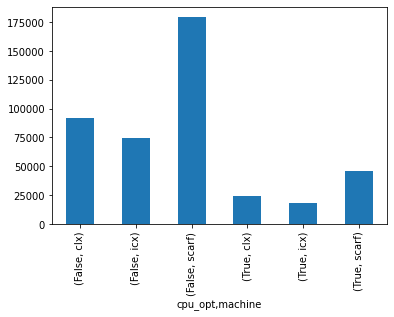

In [184]:
df.loc[df.stage == '1'].groupby(['cpu_opt', 'machine']).total_duration.max().plot.bar()

## 10338

## Stage 0

In [114]:
subset_df = df.loc[df.pipeline_file.map(lambda x: 'class2d' in x)]
subset_df = subset_df.loc[subset_df.index >= min_job_id]
final = process_steps(subset_df)
final.to_csv(f'runs/{machine}_10338_0.csv')
to_markdown(final, f'runs/{machine}_10338_0.md')
final

,pipeline_file,total_duration,steps,RELION_OPT_FLAGS,RELION_CMD,RELION_MPI_FLAGS,RELION_CPUS_PER_TASK,RELION_IMG,RELION_PROJ_DIR,RELION_OUTPUT_DIR,...,relion_refine_mpi class_92_occ,relion_refine_mpi class_93_occ,relion_refine_mpi class_94_occ,relion_refine_mpi class_95_occ,relion_refine_mpi class_96_occ,relion_refine_mpi class_97_occ,relion_refine_mpi class_98_occ,relion_refine_mpi class_99_occ,relion_refine_mpi class_100_occ,relion_refine_mpi num_top
job_id,,,,,,,,,,,,,,,,,,,,,
229744,benchmark_scripts/10338/pipeline_class2d_0.sh,43481.037481,"[{'name': 'relion_refine_mpi', 'duration': 434...",--dont_combine_weights_via_disc --pool 23 --cp...,,,1,/home/vol08/scarf688/git/intel-e2e-benchmark/c...,/work3/projects/sciml/scarf688/relion/10338,/work3/projects/sciml/scarf688/relion/runs/sca...,...,0.0,0.000000,0.00000,0.022741,0.005514,0.003821,0.049305,0.0,0.031748,22.0
236372,benchmark_scripts/10338/pipeline_class2d_0.sh,79316.885151,"[{'name': 'relion_refine_mpi', 'duration': 793...",--dont_combine_weights_via_disc --pool 23 --j 4,,,1,/home/vol08/scarf688/git/intel-e2e-benchmark/c...,/work3/projects/sciml/scarf688/relion/10338,/work3/projects/sciml/scarf688/relion/runs/sca...,...,0.0,0.022289,0.01003,0.015659,0.005470,0.000000,0.000000,0.0,0.000000,20.0


## Stage 1

In [115]:
subset_df = df.loc[df.pipeline_file.map(lambda x: 'class3d' in x)]
subset_df = subset_df.loc[subset_df.index >= min_job_id]
final = process_steps(subset_df)
final.to_csv(f'runs/{machine}_10338_1.csv')
to_markdown(final, f'runs/{machine}_10338_1.md')
final

,pipeline_file,total_duration,steps,RELION_OPT_FLAGS,RELION_CMD,RELION_MPI_FLAGS,RELION_CPUS_PER_TASK,RELION_IMG,RELION_PROJ_DIR,RELION_OUTPUT_DIR,RELION_SCRIPT_NAME,RELION_CPU_THREADS_PER_TASK,RELION_NUM_CPUS,path,cpu_opt,machine,relion_refine_mpi duration,relion_star_handler duration
job_id,,,,,,,,,,,,,,,,,,
229745,benchmark_scripts/10338/pipeline_class3d_1.sh,45698.358715,"[{'name': 'relion_refine_mpi', 'duration': 456...",--dont_combine_weights_via_disc --pool 23 --cp...,,,1,/home/vol08/scarf688/git/intel-e2e-benchmark/c...,/work3/projects/sciml/scarf688/relion/10338,/work3/projects/sciml/scarf688/relion/runs/sca...,./benchmark_scripts/10338/pipeline_class3d_1.sh,4,23,runs/scarf/job_229745/metrics.json,True,scarf,45682.698996,15.582268
236373,benchmark_scripts/10338/pipeline_class3d_1.sh,179453.577434,"[{'name': 'relion_refine_mpi', 'duration': 179...",--dont_combine_weights_via_disc --pool 23 --j 4,,,1,/home/vol08/scarf688/git/intel-e2e-benchmark/c...,/work3/projects/sciml/scarf688/relion/10338,/work3/projects/sciml/scarf688/relion/runs/sca...,./benchmark_scripts/10338/pipeline_class3d_1.sh,4,23,runs/scarf/job_236373/metrics.json,False,scarf,179439.486109,14.009530


## Stage 2

In [116]:
subset_df = df.loc[df.pipeline_file.map(lambda x: 'refine3d_2' in x)]
subset_df = subset_df.loc[subset_df.index >= min_job_id]
final = process_steps(subset_df)
final.to_csv(f'runs/{machine}_10338_2.csv')
to_markdown(final, f'runs/{machine}_10338_2.md')
final

,pipeline_file,total_duration,steps,RELION_OPT_FLAGS,RELION_CMD,RELION_MPI_FLAGS,RELION_CPUS_PER_TASK,RELION_IMG,RELION_PROJ_DIR,RELION_OUTPUT_DIR,...,relion_postprocess duration,relion_ctf_refine_mpi duration,relion_refine_mpi acc_rotation,relion_refine_mpi acc_translation,relion_refine_mpi resolution,relion_postprocess _rlnFinalResolution,relion_postprocess _rlnBfactorUsedForSharpening,relion_postprocess _rlnParticleBoxFractionSolventMask,relion_ctf_refine_mpi beam_tilt_x,relion_ctf_refine_mpi beam_tilt_y
job_id,,,,,,,,,,,,,,,,,,,,,
229746,benchmark_scripts/10338/pipeline_refine3d_2.sh,45836.008068,"[{'name': 'relion_refine_mpi', 'duration': 452...",--dont_combine_weights_via_disc --pool 23 --cp...,,,1,/home/vol08/scarf688/git/intel-e2e-benchmark/c...,/work3/projects/sciml/scarf688/relion/10338,/work3/projects/sciml/scarf688/relion/runs/sca...,...,6.460909,570.640876,1.190,0.47712,3.629367,3.150769,-114.15386,44.736736,-0.11186,0.104943
236374,benchmark_scripts/10338/pipeline_refine3d_2.sh,157991.553660,"[{'name': 'relion_refine_mpi', 'duration': 157...",--dont_combine_weights_via_disc --pool 23 --j 4,,,1,/home/vol08/scarf688/git/intel-e2e-benchmark/c...,/work3/projects/sciml/scarf688/relion/10338,/work3/projects/sciml/scarf688/relion/runs/sca...,...,6.718193,614.325773,1.175,0.47264,3.629367,3.150769,-114.15386,44.736736,-0.11164,0.103837


## Stage 3

In [117]:
subset_df = df.loc[df.pipeline_file.map(lambda x: 'refine3d_3' in x)]
subset_df = subset_df.loc[subset_df.index >= min_job_id]
final = process_steps(subset_df)
final.to_csv(f'runs/{machine}_10338_3.csv')
to_markdown(final, f'runs/{machine}_10338_3.md')

## Stage 4

In [118]:
subset_df = df.loc[df.pipeline_file.map(lambda x: 'refine3d_4' in x)]
subset_df = subset_df.loc[subset_df.index >= min_job_id]
final = process_steps(subset_df)
final.to_csv(f'runs/{machine}_10338_4.csv')
to_markdown(final, f'runs/{machine}_10338_4.md')
final

,pipeline_file,total_duration,steps,RELION_OPT_FLAGS,RELION_CMD,RELION_MPI_FLAGS,RELION_CPUS_PER_TASK,RELION_IMG,RELION_PROJ_DIR,RELION_OUTPUT_DIR,...,RELION_NUM_CPUS,path,cpu_opt,machine,relion_refine_mpi duration,relion_mask_create duration,relion_postprocess duration,relion_postprocess _rlnFinalResolution,relion_postprocess _rlnBfactorUsedForSharpening,relion_postprocess _rlnParticleBoxFractionSolventMask
job_id,,,,,,,,,,,,,,,,,,,,,
229748,benchmark_scripts/10338/pipeline_refine3d_4.sh,133513.595857,"[{'name': 'relion_refine_mpi', 'duration': 132...",--dont_combine_weights_via_disc --pool 23 --cp...,,,1,/home/vol08/scarf688/git/intel-e2e-benchmark/c...,/work3/projects/sciml/scarf688/relion/10338,/work3/projects/sciml/scarf688/relion/runs/sca...,...,23,runs/scarf/job_229748/metrics.json,True,scarf,132000.916240,1461.766216,50.673601,3.150769,-111.32904,38.844176
236376,benchmark_scripts/10338/pipeline_refine3d_4.sh,153425.248959,"[{'name': 'relion_refine_mpi', 'duration': 151...",--dont_combine_weights_via_disc --pool 23 --j 4,,,1,/home/vol08/scarf688/git/intel-e2e-benchmark/c...,/work3/projects/sciml/scarf688/relion/10338,/work3/projects/sciml/scarf688/relion/runs/sca...,...,23,runs/scarf/job_236376/metrics.json,False,scarf,151826.454969,1504.158665,94.415886,3.150769,-111.32904,38.844176


## Stage 5

In [199]:
subset_df = df.loc[df.pipeline_file.map(lambda x: 'polish' in x)]
subset_df = subset_df.loc[subset_df.index >= min_job_id]
subset_df = subset_df.tail(2)
final = process_steps(subset_df)
final.to_csv(f'runs/{machine}_10338_5.csv')
to_markdown(final, f'runs/{machine}_10338_5.md')
final

,pipeline_file,total_duration,steps,RELION_OPT_FLAGS,RELION_CMD,RELION_SCRIPT_NAME,RELION_CPU_THREADS_PER_TASK,RELION_MPI_FLAGS,RELION_PROJ_DIR,RELION_OUTPUT_DIR,...,cpu_opt,machine,relion_motion_refine duration,relion_motion_refine_mpi duration,relion_motion_refine 0,relion_motion_refine_mpi 0,relion_motion_refine 1,relion_motion_refine_mpi 1,relion_motion_refine 2,relion_motion_refine_mpi 2
job_id,,,,,,,,,,,,,,,,,,,,,
78426,benchmark_scripts/10338/pipeline_polish_5.sh,51210.929050,"[{'name': 'relion_motion_refine', 'duration': ...",--dont_combine_weights_via_disc --pool 2 --j 4,,./benchmark_scripts/10338/pipeline_polish_5.sh,4,-n 2,/home/nx07/nx07/sljack92/relion/10338,/home/nx07/nx07/sljack92/intel-e2e-benchmark/c...,...,False,clx,16745.184577,34465.505123,0.87,0.87,8385.0,8385.0,2.88,2.88
80208,benchmark_scripts/10338/pipeline_polish_5.sh,55251.166209,"[{'name': 'relion_motion_refine', 'duration': ...",--dont_combine_weights_via_disc --cpu --pool 2...,,./benchmark_scripts/10338/pipeline_polish_5.sh,4,-n 2,/home/nx07/nx07/sljack92/relion/10338,/home/nx07/nx07/sljack92/intel-e2e-benchmark/c...,...,True,clx,19889.665503,35361.204431,0.87,0.87,8385.0,8385.0,2.88,2.88
